In [23]:
# Load libriaries.
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import FastICA

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0
plt.rcParams['axes.titlesize'] = 6.0

In [18]:
# Define helper functions.
scaler = StandardScaler(copy=True) # Define standard scaler instance.
detector = IsolationForest(n_estimators=1000, random_state=0) # Define outlier detector instance.
imputer = KNNImputer() # Define imputation instance.
decomposition = FastICA(n_components=None) # Define independent component analysis instance.

In [4]:
# Load data and keep only first six months.
data = pd.read_excel("data.xlsx")
data = data[data["Date"] <= "2004-09-10"]

# Visualize data summary.
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,3447.000000,4275.000000,914.000000,4275.000000,4275.000000,3525.000000,4275.000000,3522.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000
mean,1.918422,1077.334113,218.811816,9.850661,937.848090,126.051348,897.271150,94.706133,1617.936394,944.460370,23.451201,42.485045,1.153040
std,1.206673,200.344215,204.459921,6.566329,240.489984,83.970746,228.686816,36.637686,255.788785,343.175279,7.843419,15.985736,0.343338
min,0.100000,708.000000,7.000000,0.464418,437.000000,2.000000,387.500000,5.000000,955.000000,263.000000,6.100000,9.175000,0.375444
25%,1.000000,932.250000,67.000000,4.843458,755.500000,63.000000,735.875000,67.000000,1441.750000,692.875000,17.300000,29.500000,0.904255
50%,1.700000,1047.500000,150.000000,8.499723,919.500000,108.000000,860.000000,94.000000,1587.000000,896.500000,23.450000,42.500000,1.096318
75%,2.500000,1184.250000,297.000000,13.385657,1096.500000,168.000000,1022.750000,119.000000,1752.625000,1150.625000,28.600000,54.000000,1.366492
max,8.100000,2039.750000,1189.000000,40.260061,1776.250000,631.000000,1940.750000,233.000000,2746.000000,2474.750000,44.600000,85.150002,2.180639


In [5]:
# Select columns and remove rows with missing values.
columns = ["PT08.S1(CO)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "AH", "CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)"]
data = data[columns]

# Scale data to zero mean and unit variance.
X_t = scaler.fit_transform(data)

# Restore frame.
data = pd.DataFrame(X_t, columns=columns)
t = np.linspace(0, data.shape[0], data.shape[0])/24
data["time"] = t

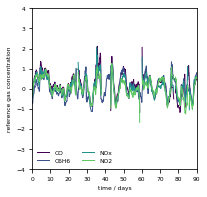

In [7]:
# Define outputs.
outputs = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)"]

# Plot different references.
fig = plt.figure(figsize=(2.95,2.95))
colors = plt.cm.Wistia(np.linspace(0,1,4))
for k, label in enumerate(outputs):
    plt.plot(data.rolling(24, min_periods=1, center=True).mean()["time"], 
             data.rolling(24, min_periods=1, center=True).mean()[label], 
             color=plt.cm.viridis(k/len(outputs)), label=label[:-4])
plt.xlabel("time / days")
plt.ylabel("reference gas concentration")
plt.legend(loc=3, frameon=False, ncol=2)
plt.xlim((0, 90))
plt.ylim((-4.0, 4.0))
plt.savefig("./figures/time_series_references",dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')

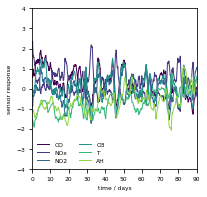

In [59]:
# Define outputs.
inputs = ["PT08.S1(CO)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "AH"]
labels = [item.split("(")[-1].split(")")[0] for item in inputs] # Customize labels.

# Plot different references.
fig = plt.figure(figsize=(2.95,2.95))
colors = plt.cm.Wistia(np.linspace(0,1,4))
for k, label in enumerate(inputs):
    plt.plot(data.rolling(24, min_periods=1, center=True).mean()["time"], 
             data.rolling(24, min_periods=1, center=True).mean()[label], 
             color=plt.cm.viridis(k/len(inputs)), label=labels[k])
plt.xlabel("time / days")
plt.ylabel("sensor response")
plt.legend(loc=3, frameon=False, ncol=2)
plt.xlim((0, 90))
plt.ylim((-4.0, 4.0))
plt.savefig("./figures/time_series_sensors",dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')